<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/10-operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Операции с числами и строками

In [2]:
import pandas as pd
import numpy as np

Создаем датафрейм

In [3]:
df = pd.DataFrame({'Колонка 1': [1, 2, 3, 4, 5, 6],
              'Колонка 2': [6, 5, 4, 3, 2, 1],
              'Колонка 3': [np.nan, 3, 5, 0, 9, 11],
              'Имя': ['Миша', 'Саша', 'Юля',
                            'Настя', 'Андрей', 'Катя'],
              'Увлечение': ['Баскетбол', 'Хоккей', 'Волейбол',
                            'Футбол', 'Counter-Strike', 'Бильярд']
             })

In [4]:
df

,Колонка 1,Колонка 2,Колонка 3,Имя,Увлечение
0,1,6,NaN,Миша,Баскетбол
1,2,5,3.0,Саша,Хоккей
2,3,4,5.0,Юля,Волейбол
3,4,3,0.0,Настя,Футбол
4,5,2,9.0,Андрей,Counter-Strike
5,6,1,11.0,Катя,Бильярд


# Операции с числами

| Знак   | Операция              | Метод                 |
|:-------|:----------------------|:----------------------|
| +      | Сумма                 | add                   |
| -      | Разность              | sub                   |
| *      | Умножение             | mul                   |
| /      | Деление               | div, truediv          |
| //     | Целочисленное деление | floordiv              |
| %      | Остаток от деления    | mod                   |
| **     | Возведение в степень  | pow                   |

#### Сложение колонки и числа

Выбирать колонку и присваивать ей значение вы можете как хотите

In [5]:
# Каждое значение в колонке увеличилось на 1
df['Колонка 1'] + 1

0    2
1    3
2    4
3    5
4    6
5    7
Name: Колонка 1, dtype: int64

In [6]:
df['Колонка 1'].add(1)

0    2
1    3
2    4
3    5
4    6
5    7
Name: Колонка 1, dtype: int64

#### Сложение двух колонок

In [7]:
df['Колонка 1'] + df['Колонка 2']

0    7
1    7
2    7
3    7
4    7
5    7
dtype: int64

#### Сложение колонок с пропущенными значениями

In [8]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

#### Пропущенное значение всегда остается пропущенным значением

In [9]:
df['Колонка 1'] + df['Колонка 3']

0     NaN
1     5.0
2     8.0
3     4.0
4    14.0
5    17.0
dtype: float64

#### Часто за пропусками скрываются нули. Заполнить пропуски нулем или каким-то другим значением можно методом fillna(), передав в него значение, которое вы хотите положить на метсто пропусков

In [10]:
df['Колонка 1'] + df['Колонка 3'].fillna(0)

0     1.0
1     5.0
2     8.0
3     4.0
4    14.0
5    17.0
dtype: float64

Изначально в колонке есть пропуск

In [11]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

Мы заполнили его нулем

In [12]:
df['Колонка 3'].fillna(0)

0     0.0
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

#### Сопоставление колонок при сложении идет по индексам

Проэтому если вы складываете 2 разные таблицы, то проверьте, что в них совпадают индексы

In [13]:
# поменяли индексы
df['Колонка 1'].set_axis([3, 4, 5, 6, 7, 8])

3    1
4    2
5    3
6    4
7    5
8    6
Name: Колонка 1, dtype: int64

In [14]:
df['Колонка 1'].set_axis([3, 4, 5, 6, 7, 8]) + df['Колонка 2']

0    NaN
1    NaN
2    NaN
3    4.0
4    4.0
5    4.0
6    NaN
7    NaN
8    NaN
dtype: float64

По этой же причине не допускайте повторяющихся индексов при арифметических операциях

#### Вычитание

In [15]:
df['Колонка 1'] - 2
# df['Колонка 1'].sub(2)

0   -1
1    0
2    1
3    2
4    3
5    4
Name: Колонка 1, dtype: int64

In [16]:
2 - df['Колонка 1']
# df['Колонка 1'].rsub(2)

0    1
1    0
2   -1
3   -2
4   -3
5   -4
Name: Колонка 1, dtype: int64

Разность двух колонок

In [17]:
df['Колонка 1'] - df['Колонка 2']

0   -5
1   -3
2   -1
3    1
4    3
5    5
dtype: int64

#### Умножение

In [18]:
df['Колонка 1'] * 2

0     2
1     4
2     6
3     8
4    10
5    12
Name: Колонка 1, dtype: int64

In [19]:
df['Колонка 1'] * df['Колонка 2']

0     6
1    10
2    12
3    12
4    10
5     6
dtype: int64

#### Деление

In [20]:
df['Колонка 1'] / 2

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
Name: Колонка 1, dtype: float64

При делении на ноль получается знчение inf или NaN

In [21]:
df['Колонка 3']

0     NaN
1     3.0
2     5.0
3     0.0
4     9.0
5    11.0
Name: Колонка 3, dtype: float64

In [22]:
df['Колонка 1'] / df['Колонка 3']

0         NaN
1    0.666667
2    0.600000
3         inf
4    0.555556
5    0.545455
dtype: float64

In [23]:
(-df['Колонка 1']) / df['Колонка 3']

0         NaN
1   -0.666667
2   -0.600000
3        -inf
4   -0.555556
5   -0.545455
dtype: float64

In [24]:
(df['Колонка 1'] / df['Колонка 3']) > 1000000000000

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

0/0

In [25]:
df['Колонка 3'] / df['Колонка 3']

0    NaN
1    1.0
2    1.0
3    NaN
4    1.0
5    1.0
Name: Колонка 3, dtype: float64

#### Целочисленное деление

5 / 2 = 2, остаток 1    
   
   
делеимое / делитель = частное и остаток от деления

In [26]:
df['Колонка 1'] // 2

0    0
1    1
2    1
3    2
4    2
5    3
Name: Колонка 1, dtype: int64

#### Остаток от деления

In [27]:
df['Колонка 1'] % 2

0    1
1    0
2    1
3    0
4    1
5    0
Name: Колонка 1, dtype: int64

#### Возведние в степень

In [28]:
df['Колонка 1'] ** 2

0     1
1     4
2     9
3    16
4    25
5    36
Name: Колонка 1, dtype: int64

In [29]:
df['Колонка 1'] ** df['Колонка 1']

0        1
1        4
2       27
3      256
4     3125
5    46656
Name: Колонка 1, dtype: int64

#### Целые числа нельзя возводить в отрицательную степень

In [30]:
df['Колонка 1'] ** - 2

ValueError: Integers to negative integer powers are not allowed.

In [31]:
df['Колонка 1'].astype(float) ** -2

0    1.000000
1    0.250000
2    0.111111
3    0.062500
4    0.040000
5    0.027778
Name: Колонка 1, dtype: float64

In [32]:
1 / df['Колонка 1'] ** 2

0    1.000000
1    0.250000
2    0.111111
3    0.062500
4    0.040000
5    0.027778
Name: Колонка 1, dtype: float64

### Арифметические операции определены стандартно, но если что-то непонятно, то лучше ставить скобки

In [33]:
((df['Колонка 1'] + df['Колонка 3']) * df['Колонка 2']) ** 0.5

0         NaN
1    5.000000
2    5.656854
3    3.464102
4    5.291503
5    4.123106
dtype: float64

In [34]:
df['Колонка 1'] / 2 * 100

0     50.0
1    100.0
2    150.0
3    200.0
4    250.0
5    300.0
Name: Колонка 1, dtype: float64

In [35]:
(df['Колонка 1'] / 2) * 100

0     50.0
1    100.0
2    150.0
3    200.0
4    250.0
5    300.0
Name: Колонка 1, dtype: float64

#### Когда мы записываем выражение в скобках мы его можем переносить между строк как угодно

In [36]:
(
df['Колонка 1']
+
df['Колонка 1']
)

0     2
1     4
2     6
3     8
4    10
5    12
Name: Колонка 1, dtype: int64

#### Если мы после выполнения арифметических операций хотим использовать какие-то другие методы, то все выражение мы должны обернуть в круглые скобки

In [37]:
(df['Колонка 1'] + df['Колонка 2'])

0    7
1    7
2    7
3    7
4    7
5    7
dtype: int64

In [38]:
(df['Колонка 1'] + df['Колонка 2']).sample(10, replace=True, random_state=9)

4    7
5    7
0    7
3    7
5    7
1    7
4    7
3    7
0    7
2    7
dtype: int64

Иначе метод sample будет применен только к первому датафрейму

In [39]:
df['Колонка 1'] + df['Колонка 2'].sample(10, replace=True, random_state=9)

0    7
0    7
1    7
2    7
3    7
3    7
4    7
4    7
5    7
5    7
dtype: int64

# Операции со строками

In [40]:
df['Имя']

0      Миша
1      Саша
2       Юля
3     Настя
4    Андрей
5      Катя
Name: Имя, dtype: object

#### Умножение на целое число

In [41]:
df['Имя'] * 3

0          МишаМишаМиша
1          СашаСашаСаша
2             ЮляЮляЮля
3       НастяНастяНастя
4    АндрейАндрейАндрей
5          КатяКатяКатя
Name: Имя, dtype: object

#### Сложение двух строк

In [42]:
df['Имя'] + ' хороший человек'

0      Миша хороший человек
1      Саша хороший человек
2       Юля хороший человек
3     Настя хороший человек
4    Андрей хороший человек
5      Катя хороший человек
Name: Имя, dtype: object

In [43]:
df['Имя'] + df['Увлечение']

0           МишаБаскетбол
1              СашаХоккей
2             ЮляВолейбол
3             НастяФутбол
4    АндрейCounter-Strike
5             КатяБильярд
dtype: object

In [44]:
df['Имя'] + ' любит ' + df['Увлечение']

0           Миша любит Баскетбол
1              Саша любит Хоккей
2             Юля любит Волейбол
3             Настя любит Футбол
4    Андрей любит Counter-Strike
5             Катя любит Бильярд
dtype: object

# Операции с датафреймами

Если операция определена для всех колонок датафрейма, то она может быть применена

In [45]:
df * 2

,Колонка 1,Колонка 2,Колонка 3,Имя,Увлечение
0,2,12,NaN,МишаМиша,БаскетболБаскетбол
1,4,10,6.0,СашаСаша,ХоккейХоккей
2,6,8,10.0,ЮляЮля,ВолейболВолейбол
3,8,6,0.0,НастяНастя,ФутболФутбол
4,10,4,18.0,АндрейАндрей,Counter-StrikeCounter-Strike
5,12,2,22.0,КатяКатя,БильярдБильярд


In [46]:
df + df + df

,Колонка 1,Колонка 2,Колонка 3,Имя,Увлечение
0,3,18,NaN,МишаМишаМиша,БаскетболБаскетболБаскетбол
1,6,15,9.0,СашаСашаСаша,ХоккейХоккейХоккей
2,9,12,15.0,ЮляЮляЮля,ВолейболВолейболВолейбол
3,12,9,0.0,НастяНастяНастя,ФутболФутболФутбол
4,15,6,27.0,АндрейАндрейАндрей,Counter-StrikeCounter-StrikeCounter-Strike
5,18,3,33.0,КатяКатяКатя,БильярдБильярдБильярд


In [47]:
df.iloc[:, :3]

,Колонка 1,Колонка 2,Колонка 3
0,1,6,NaN
1,2,5,3.0
2,3,4,5.0
3,4,3,0.0
4,5,2,9.0
5,6,1,11.0


In [48]:
df.iloc[:, :3] + 1

,Колонка 1,Колонка 2,Колонка 3
0,2,7,NaN
1,3,6,4.0
2,4,5,6.0
3,5,4,1.0
4,6,3,10.0
5,7,2,12.0


In [49]:
df.iloc[:, :3] * 2

,Колонка 1,Колонка 2,Колонка 3
0,2,12,NaN
1,4,10,6.0
2,6,8,10.0
3,8,6,0.0
4,10,4,18.0
5,12,2,22.0


In [50]:
df.iloc[:, :3] ** 2

,Колонка 1,Колонка 2,Колонка 3
0,1,36,NaN
1,4,25,9.0
2,9,16,25.0
3,16,9,0.0
4,25,4,81.0
5,36,1,121.0


#### Сложение со списком идет построчно

In [51]:
df.iloc[:, :3] + [100, 10000, 1000000]

,Колонка 1,Колонка 2,Колонка 3
0,101,10006,NaN
1,102,10005,1000003.0
2,103,10004,1000005.0
3,104,10003,1000000.0
4,105,10002,1000009.0
5,106,10001,1000011.0


Поэтому просто так колонку к датафрему прибавить не получится

In [52]:
df.iloc[:, :3] + df['Колонка 1']

,Колонка 1,Колонка 2,Колонка 3,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df['Колонка 1'].to_numpy().reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]], dtype=int64)

In [54]:
df.iloc[:, :3] + df['Колонка 1'].to_numpy().reshape(-1, 1)

,Колонка 1,Колонка 2,Колонка 3
0,2,7,NaN
1,4,7,5.0
2,6,7,8.0
3,8,7,4.0
4,10,7,14.0
5,12,7,17.0


# Операции с векторами и матрицами

Создаем 2 матрицы и вектор

In [55]:
np.random.seed(32)
matrix_1 = np.arange(24).reshape(6, -1)
matrix_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [56]:
np.random.seed(32)
matrix_2 = np.random.randint(10, size=(4, 6))
matrix_2

array([[7, 5, 6, 8, 3, 7],
       [9, 3, 5, 9, 4, 1],
       [3, 1, 2, 3, 8, 2],
       [4, 2, 4, 4, 9, 5]])

In [57]:
vector = np.arange(4)
vector

array([0, 1, 2, 3])

Все операции определены так же, как и у DataFrame и Series

In [58]:
matrix_1 * 2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22],
       [24, 26, 28, 30],
       [32, 34, 36, 38],
       [40, 42, 44, 46]])

In [59]:
vector + 10

array([10, 11, 12, 13])

In [60]:
matrix_1 + matrix_2.T

array([[ 7, 10,  5,  7],
       [ 9,  8,  7,  9],
       [14, 14, 12, 15],
       [20, 22, 17, 19],
       [19, 21, 26, 28],
       [27, 22, 24, 28]])

In [61]:
matrix_1 + vector

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14],
       [12, 14, 16, 18],
       [16, 18, 20, 22],
       [20, 22, 24, 26]])

In [62]:
matrix_2 + vector.reshape(-1, 1)

array([[ 7,  5,  6,  8,  3,  7],
       [10,  4,  6, 10,  5,  2],
       [ 5,  3,  4,  5, 10,  4],
       [ 7,  5,  7,  7, 12,  8]])

In [63]:
(matrix_2.T + vector).T

array([[ 7,  5,  6,  8,  3,  7],
       [10,  4,  6, 10,  5,  2],
       [ 5,  3,  4,  5, 10,  4],
       [ 7,  5,  7,  7, 12,  8]])

### Скалярное произведение

In [64]:
vector @ np.arange(5, 9)

44

In [65]:
print(vector)
print(np.arange(5, 9))
print('---------')
print(vector * np.arange(5, 9))
print((vector * np.arange(5, 9)).sum())

[0 1 2 3]
[5 6 7 8]
---------
[ 0  6 14 24]
44


#### Матричное умнжение

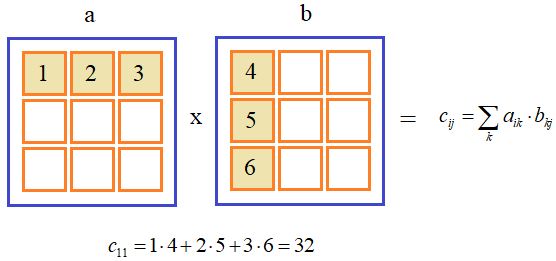

In [66]:
matrix_1 @ matrix_2

array([[ 27,  11,  21,  27,  47,  20],
       [119,  55,  89, 123, 143,  80],
       [211,  99, 157, 219, 239, 140],
       [303, 143, 225, 315, 335, 200],
       [395, 187, 293, 411, 431, 260],
       [487, 231, 361, 507, 527, 320]])

In [67]:
matrix_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [68]:
matrix_2

array([[7, 5, 6, 8, 3, 7],
       [9, 3, 5, 9, 4, 1],
       [3, 1, 2, 3, 8, 2],
       [4, 2, 4, 4, 9, 5]])

In [69]:
matrix_2 @ matrix_1

array([[352, 388, 424, 460],
       [244, 275, 306, 337],
       [224, 243, 262, 281],
       [332, 360, 388, 416]])

In [70]:
matrix_1.dot(matrix_2)

array([[ 27,  11,  21,  27,  47,  20],
       [119,  55,  89, 123, 143,  80],
       [211,  99, 157, 219, 239, 140],
       [303, 143, 225, 315, 335, 200],
       [395, 187, 293, 411, 431, 260],
       [487, 231, 361, 507, 527, 320]])

### Операциями с векторами разных размеров

In [71]:
vector_1 = np.arange(1, 10).reshape(-1, 1)
vector_1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [72]:
vector_2 = np.arange(1, 7)
vector_2

array([1, 2, 3, 4, 5, 6])

In [73]:
vector_1 * vector_2

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

In [74]:
vector_1 @ vector_2.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

In [75]:
vector_1 @ vector_2[None, ...]

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36],
       [ 7, 14, 21, 28, 35, 42],
       [ 8, 16, 24, 32, 40, 48],
       [ 9, 18, 27, 36, 45, 54]])

### Многомерные операции

In [81]:
np.random.seed(42)
tenzor = np.random.randint(10, size=(2, 4, 4))
np.random.seed(4223)
matrix = np.random.randint(10, size=(4, 4))
tenzor

array([[[6, 3, 7, 4],
        [6, 9, 2, 6],
        [7, 4, 3, 7],
        [7, 2, 5, 4]],

       [[1, 7, 5, 1],
        [4, 0, 9, 5],
        [8, 0, 9, 2],
        [6, 3, 8, 2]]])

In [82]:
matrix

array([[3, 7, 2, 0],
       [2, 4, 3, 3],
       [8, 0, 2, 5],
       [1, 8, 4, 8]])

In [83]:
tenzor.shape

(2, 4, 4)

In [84]:
tenzor[0]

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7],
       [7, 2, 5, 4]])

In [85]:
tenzor[1]

array([[1, 7, 5, 1],
       [4, 0, 9, 5],
       [8, 0, 9, 2],
       [6, 3, 8, 2]])

In [86]:
matrix @ tenzor

array([[[ 74,  80,  41,  68],
        [ 78,  60,  46,  65],
        [ 97,  42,  87,  66],
        [138, 107,  75, 112]],

       [[ 47,  21,  96,  42],
        [ 60,  23,  97,  34],
        [ 54,  71,  98,  22],
        [113,  31, 177,  65]]])

In [87]:
matrix @ tenzor[0]

array([[ 74,  80,  41,  68],
       [ 78,  60,  46,  65],
       [ 97,  42,  87,  66],
       [138, 107,  75, 112]])

In [88]:
matrix @ tenzor[1]

array([[ 47,  21,  96,  42],
       [ 60,  23,  97,  34],
       [ 54,  71,  98,  22],
       [113,  31, 177,  65]])

In [89]:
tenzor @ tenzor

array([[[131,  81,  89, 107],
        [146, 119,  96, 116],
        [136,  83, 101, 101],
        [117,  67,  88,  91]],

       [[ 75,  10, 121,  48],
        [106,  43, 141,  32],
        [ 92,  62, 137,  30],
        [ 94,  48, 145,  41]]])

In [90]:
tenzor[0] @ tenzor[0]

array([[131,  81,  89, 107],
       [146, 119,  96, 116],
       [136,  83, 101, 101],
       [117,  67,  88,  91]])

Это работает не только с матричным умножением, но и с другими операциями

In [91]:
tenzor * tenzor[0]

array([[[36,  9, 49, 16],
        [36, 81,  4, 36],
        [49, 16,  9, 49],
        [49,  4, 25, 16]],

       [[ 6, 21, 35,  4],
        [24,  0, 18, 30],
        [56,  0, 27, 14],
        [42,  6, 40,  8]]])

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1

Перемножьте колонки price (цена) и goods_number (количество товара в чеке). Назавите колонку sum_price

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# Напишите свой код здесь

### Задание 2

Посчитайте заработную плату после вычета налога в 13%

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 3

Посчитайте размер премии. Для этого создайте новую колонку bonus.

Премия выплачивается 31 декабря каждого года. В остальные месяцы премия равна нулю.
Для управляющего персонала (mgmt == 1), она равна двум заработным платам, а для всех остальных сотрудников она равна зарплате,
умноженной на оценку сотрудника и деленную на 5. Если оценка сотрудника пропущена. Заполните это значение числом 5.

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 4

Соедините колонки city и adress в одну.

Пример того, как должна выглядить колонка: г. Воронеж, Пушкинская пл., д. 76

In [ ]:
import os
import pandas as pd

path_shops = '../tables/shops.xlsx' if os.path.exists('../tables/shops.xlsx') else 'https://drive.google.com/uc?id=1gfnmceJa3Mc1X06NftTx9G9QfKfprjEB'

shops = pd.read_excel(path_shops)
shops.head()

In [ ]:
# Напишите свой код здесь

### Задание 5

Для каждого школьника создайте 3 поля: первое поле должно содержать информацию о том, что у школьника по какому-то из предметов есть тройка, второе поле, что есть четверка и третье, что есть пятерка. Закодируйет эту информацию в один столбец

Способ кодировки можете выбрать сами. Например, 1 может значить, что у человека выполнено 1 условие, а два других нет, 2 - у человека выполено 2 условие а все остальные нет, 3 - у человека выполено 3 условие а все остальные нет, 4 - у человека выполнено перовое и второе условие, а третье нет и так далее

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'
marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 6

Мы знаем оценки по разным предметам, но не по геграфии. Оценку по ней уще не поставили. Однако у нас есть модель, которая предсказывает вероятность того, что школьник получит оценки 3, 4 и 5.

Посчитайте ожидаемую оценку для каждого школьника (взвесте оценки по вероятности). Для этого колонку 3 умножьте на 3, затем прибавьте к ней колонку 4, уноженную на 4, и колонку 5, умноженную на 5. 

In [ ]:
import os
import numpy as np
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'
marks = pd.read_excel(path_marks)
p = np.random.rand(len(marks) * 3).reshape(-1, 3)
p = p / p.sum(1).reshape(-1, 1)

np.random.seed(243)
probs = marks[['ФИО', 'Пол']].join(pd.DataFrame(p, columns=[3, 4, 5]))
probs.head()

In [ ]:
# Напишите свой код здесь

### Задание 6

В ячейке ниже создается 2 матрицы. Посмотрите их на их размерность при помощи атрибута shape. После этого попробуйте их перемножить: сначала поэлементно, а затем матрично. Однако во втором случае одну из матриц придется транспонировать. Посчитайете 4 варианта: x<sup>T</sup>y, y<sup>T</sup>x, xy<sup>T</sup>, y<sup>T</sup>x

In [ ]:
import numpy as np
np.random.seed(455432)
x, y = np.random.normal(0, 1, size=(2, 3, 50))

In [ ]:
# Напишите свой код здесь

### Задание 7

Создайте 2 вектора одинакового размера и найдите между ними скалярное произведение

In [ ]:
import numpy as np

In [ ]:
# Напишите свой код здесь

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_14548\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
